In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # SVM performs better if data is scaled

In [2]:
# extracting the X and Y from the datasets
X, y = make_moons(n_samples= 100, noise=0.5)

In [3]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures


# We can Tweak C parameter to get HIGH or LOW 
model_svc= LinearSVC(C=5, loss= "hinge", random_state= 42)

# creating a Pipeline that will SCALE  the data 

svc_pp= Pipeline([
    
    ('scaler', StandardScaler()),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('svc_classifier', model_svc)
])

In [4]:
# TRAIN the model

svc_pp= svc_pp.fit(X, y)

C:\Users\daiko\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [5]:
X[3], y[3]

(array([2.81823886, 0.1873464 ]), 1)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

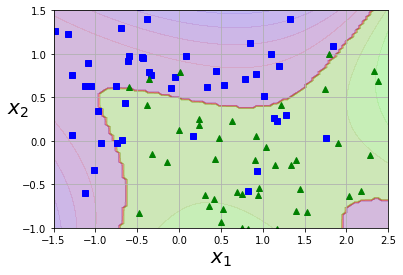

In [7]:
plot_predictions(svc_pp, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [8]:
# SVC
from sklearn.svm import SVC

svc_classifier= Pipeline([
    
    ('scaler', StandardScaler()),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('svc_classifier', SVC(kernel= 'poly', degree= 20,  coef0= 1, C= 1000))
])

In [9]:
svc_classifier.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial_features', PolynomialFeatures(degree=3)),
                ('svc_classifier',
                 SVC(C=1000, coef0=1, degree=20, kernel='poly'))])

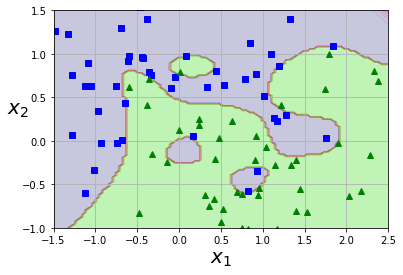

In [10]:
plot_predictions(svc_classifier, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

# using GRID search for finding the BEST HYPERPARAMETER

In [11]:
from sklearn.model_selection import GridSearchCV as GS

In [12]:
param_grid= {'C': [3, 5, 10], 'gamma':[1, 0.1, 0.01, 0.001],'kernel': ['poly', 'sigmoid', 'rbf']}

In [13]:
# FIT and TRAIN the model 
grid= GS(SVC(), param_grid, refit= True, verbose=2)

In [14]:
grid.fit(X,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........................ C=3, gamma=1, kernel=poly, total=   0.0s
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........................ C=3, gamma=1, kernel=poly, total=   0.0s
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........................ C=3, gamma=1, kernel=poly, total=   0.0s
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........................ C=3, gamma=1, kernel=poly, total=   0.0s
[CV] C=3, gamma=1, kernel=poly .......................................
[CV] ........................ C=3, gamma=1, kernel=poly, total=   0.0s
[CV] C=3, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=3, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=3, gamma=1, kernel=sigmoid ....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=5, gamma=1, kernel=poly, total=   0.0s
[CV] C=5, gamma=1, kernel=poly .......................................
[CV] ........................ C=5, gamma=1, kernel=poly, total=   0.0s
[CV] C=5, gamma=1, kernel=poly .......................................
[CV] ........................ C=5, gamma=1, kernel=poly, total=   0.0s
[CV] C=5, gamma=1, kernel=poly .......................................
[CV] ........................ C=5, gamma=1, kernel=poly, total=   0.0s
[CV] C=5, gamma=1, kernel=poly .......................................
[CV] ........................ C=5, gamma=1, kernel=poly, total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=5, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=5, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=5, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.5s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [3, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['poly', 'sigmoid', 'rbf']},
             verbose=2)

In [15]:
# FINDing the BEST estimator
print(grid.best_estimator_)

SVC(C=3, gamma=1)


In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# PARMETER for grid search
param_grid= { 'C': [1, 2,3,5,10,1000], 'gamma':[0.1, 1.0, 0.001], 'kernel': ['sigmoid', 'rbf', 'poly']}

In [18]:
# INSERT The hyparameter
grid_srch= GridSearchCV( SVC(), param_grid, refit= True, verbose=3)

# TRAIN the model
grid_srch.fit(X,y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.700, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.850, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.850, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.900, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.700, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.850, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.800, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.550, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.600, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.650, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ......... C=1, gamma=0.1, kernel=poly, score=0.550, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] .

[CV] .... C=2, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=2, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=2, gamma=0.001, kernel=sigmoid, score=0.850, total=   0.0s
[CV] C=2, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=2, gamma=0.001, kernel=sigmoid, score=0.850, total=   0.0s
[CV] C=2, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=2, gamma=0.001, kernel=sigmoid, score=0.800, total=   0.0s
[CV] C=2, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=2, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=2, gamma=0.001, kernel=rbf, score=0.750, total=   0.0s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=2, gamma=0.001, kernel=rbf, score=0.850, total=   0.0s
[CV] C=2, gamma=0.001, kernel=rbf ....................................
[CV] .

[CV] ......... C=5, gamma=0.1, kernel=poly, score=0.650, total=   0.0s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] ......... C=5, gamma=0.1, kernel=poly, score=0.700, total=   0.0s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] ......... C=5, gamma=0.1, kernel=poly, score=0.700, total=   0.0s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] ......... C=5, gamma=0.1, kernel=poly, score=0.700, total=   0.0s
[CV] C=5, gamma=1.0, kernel=sigmoid ..................................
[CV] ...... C=5, gamma=1.0, kernel=sigmoid, score=0.600, total=   0.0s
[CV] C=5, gamma=1.0, kernel=sigmoid ..................................
[CV] ...... C=5, gamma=1.0, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=5, gamma=1.0, kernel=sigmoid ..................................
[CV] ...... C=5, gamma=1.0, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=5, gamma=1.0, kernel=sigmoid ..................................
[CV] .

[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.850, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.850, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=0.750, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.850, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.850, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    1.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 5, 10, 1000],
                         'gamma': [0.1, 1.0, 0.001],
                         'kernel': ['sigmoid', 'rbf', 'poly']},
             verbose=3)

In [19]:
# find the best ESTIMATOR
grid_srch.best_estimator_

SVC(C=2, gamma=1.0)